In [1]:
from sqlalchemy import create_engine
import pandas as pd

# Database connection details
db_config = {
    'user': 'root',
    'password': 'mustapha1',
    'host': 'localhost',
    'database': 'amazon_reviews'
}

In [2]:

     
import mysql.connector
import pandas as pd

# MySQL database connection details
db_config = {
    'user': 'root',
    'password': 'mustapha1',
    'host': 'localhost',
    'database': 'amazon_reviews'
}

try:
    # Connect to the MySQL database
    conn = mysql.connector.connect(**db_config)
    
    if conn.is_connected():
        print("Successfully connected to the database")

        # SQL queries to extract data from relevant tables
        queries = {
            "productreviews": """
                SELECT 
                    id, 
                    rating, 
                    title_x, 
                    text, 
                    asin, 
                    parent_asin_x, 
                    user_id, 
                    helpful_vote, 
                    verified_purchase, 
                    main_category, 
                    title_y, 
                    average_rating, 
                    rating_number, 
                    price, 
                    store, 
                    parent_asin_y, 
                    review_date, 
                    review_time 
                FROM productreviews
            """
        }

        # Create a dictionary to store the data frames
        data_frames = {}
        for table_name, query in queries.items():
            # Use pandas to fetch data into a DataFrame
            data_frames[table_name] = pd.read_sql_query(query, conn)
            print(f"Fetched data from {table_name} table")

        # Example: Access and display the first few rows of the productreviews DataFrame
        print(data_frames["productreviews"].head())

    # Close the connection
    conn.close()
    print("Database connection closed")

except mysql.connector.Error as err:
    print(f"Database connection error: {err}")

except Exception as e:
    print(f"Unexpected error: {e}")

finally:
    # Ensure the connection is closed if it was opened
    try:
        if 'conn' in locals() and conn.is_connected():
            conn.close()
            print("Database connection closed")
    except Exception as e:
        print(f"Error while closing connection: {e}")


Successfully connected to the database


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2976813069.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frames[table_name] = pd.read_sql_query(query, conn)


Fetched data from productreviews table
      id  rating                                            title_x  \
0  25657       1            Didn’t work at all lenses loose/broken.   
1  25658       5                                         Five Stars   
2  25659       5  ... stronger WIFI to my upstairs level & it wo...   
3  25660       5                                   Good alarm clock   
4  25661       5                                       Works great!   

                                                text        asin  \
0  These didn’t work. Idk if they were damaged in...  B07N69T6TM   
1                  These work great for 8x10 frames.  B00IXNUDG2   
2  Bought to get stronger WIFI to my upstairs lev...  B00PVCXB4Y   
3  I love this alarm. Bright, nice tone. The syst...  B0093162RM   
4  Works great with my pixel 2, I can charge quic...  B07FCZY1ZB   

  parent_asin_x                       user_id  helpful_vote  \
0    B07N69T6TM  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ             0   

In [3]:
# Summary Statistics and Missing Values Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
for table, df in data_frames.items():
    print(f"Summary for {table}:\n")
    print(df.describe(include='all'), "\n")  # Summary statistics for all columns
    print(f"Missing values in {table}:\n")
    print(df.isnull().sum(), "\n")


Summary for productreviews:

                  id        rating     title_x         text        asin  \
count    99991.00000  99991.000000       99973        99962       99991   
unique           NaN           NaN       66753        93197       36423   
top              NaN           NaN  Five Stars  Works great  B00U3FPN4U   
freq             NaN           NaN        7867          238         427   
mean     75652.00000      4.236231         NaN          NaN         NaN   
std      28865.05972      1.287772         NaN          NaN         NaN   
min      25657.00000      1.000000         NaN          NaN         NaN   
25%      50654.50000      4.000000         NaN          NaN         NaN   
50%      75652.00000      5.000000         NaN          NaN         NaN   
75%     100649.50000      5.000000         NaN          NaN         NaN   
max     125647.00000      5.000000         NaN          NaN         NaN   

       parent_asin_x                       user_id  helpful_vote  \
co

In [4]:

# Step 1: Summary Statistics and Missing Values Analysis
for table, df in data_frames.items():
    print(f"Summary for {table}:\n")
    print(df.describe(), "\n")
    print(f"Missing values in {table}:\n")
    print(df.isnull().sum(), "\n")

Summary for productreviews:

                 id        rating  helpful_vote  verified_purchase  \
count   99991.00000  99991.000000  99991.000000       99991.000000   
mean    75652.00000      4.236231      1.347411           0.913482   
std     28865.05972      1.287772     22.524184           0.281129   
min     25657.00000      1.000000      0.000000           0.000000   
25%     50654.50000      4.000000      0.000000           1.000000   
50%     75652.00000      5.000000      0.000000           1.000000   
75%    100649.50000      5.000000      1.000000           1.000000   
max    125647.00000      5.000000   6142.000000           1.000000   

       average_rating  rating_number         price                review_time  
count    99991.000000   99991.000000  99958.000000                      99982  
mean         4.317145    7338.603374     64.096516  0 days 13:58:25.660818947  
std          0.365671   21713.988910    139.152350  0 days 05:37:02.748817566  
min          1.00000

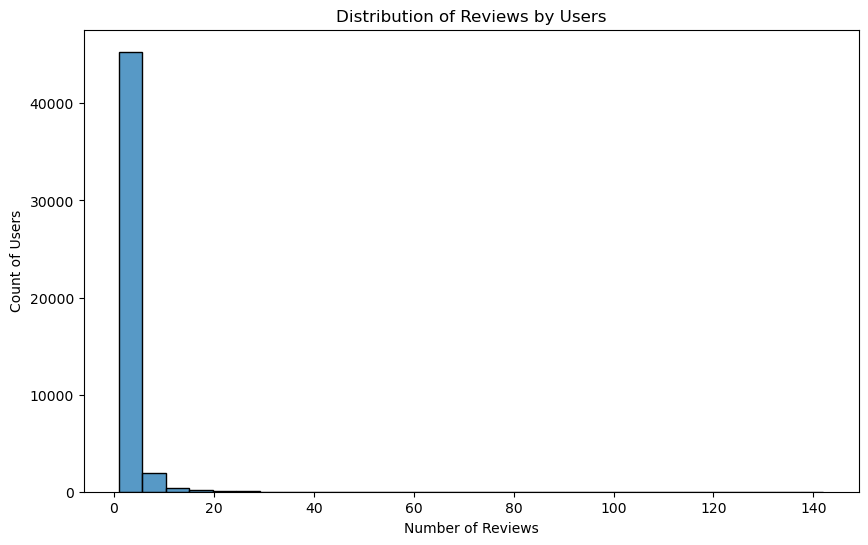

In [5]:
import seaborn as sns
reviews_df = data_frames['productreviews']

# Count the number of reviews by each user
user_review_count = reviews_df['user_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(user_review_count, bins=30, kde=False)
plt.title('Distribution of Reviews by Users')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Users')
plt.show()

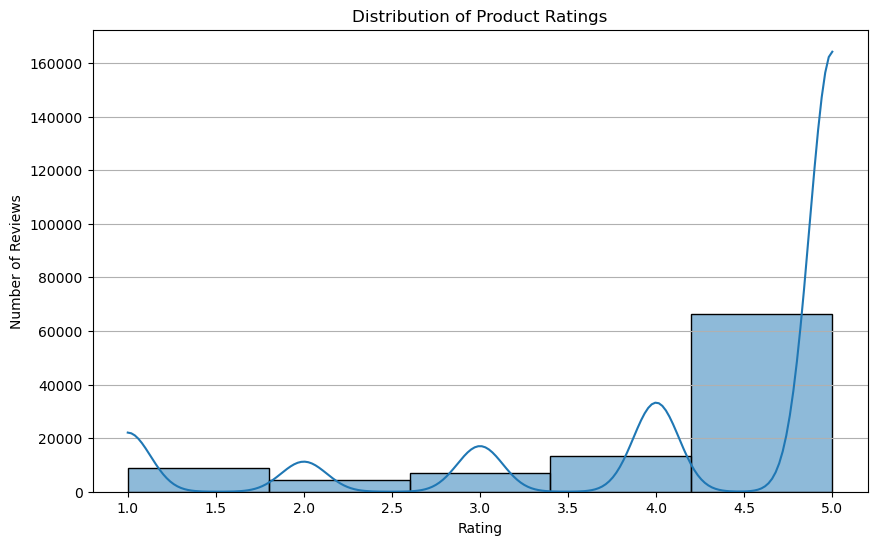

In [11]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['rating'], bins=5, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


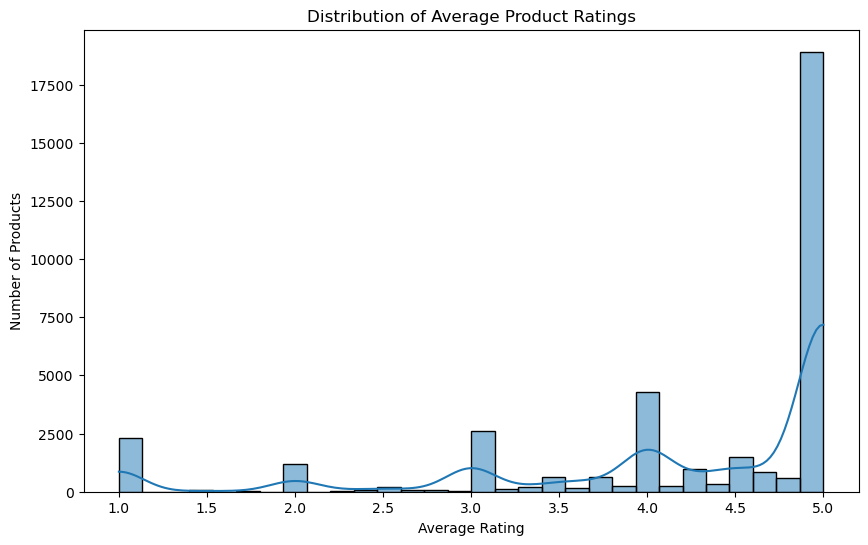

In [6]:
# Calculate the average rating for each product
product_avg_rating = reviews_df.groupby('asin')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(product_avg_rating, bins=30, kde=True)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Products')
plt.show()


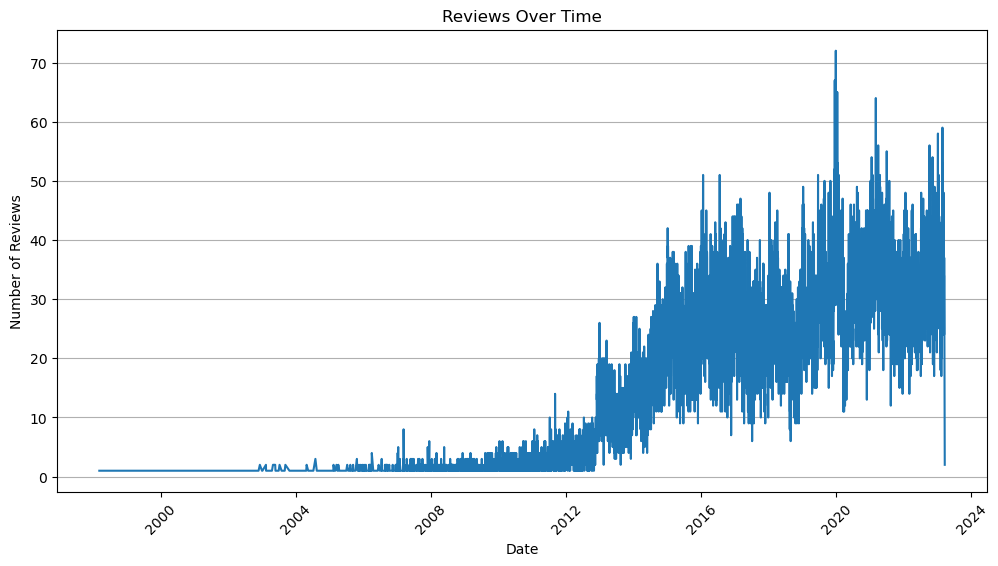

In [12]:
# Convert review_date to datetime
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')

# Reviews Over Time
reviews_over_time = reviews_df['review_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(reviews_over_time.index, reviews_over_time.values)
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


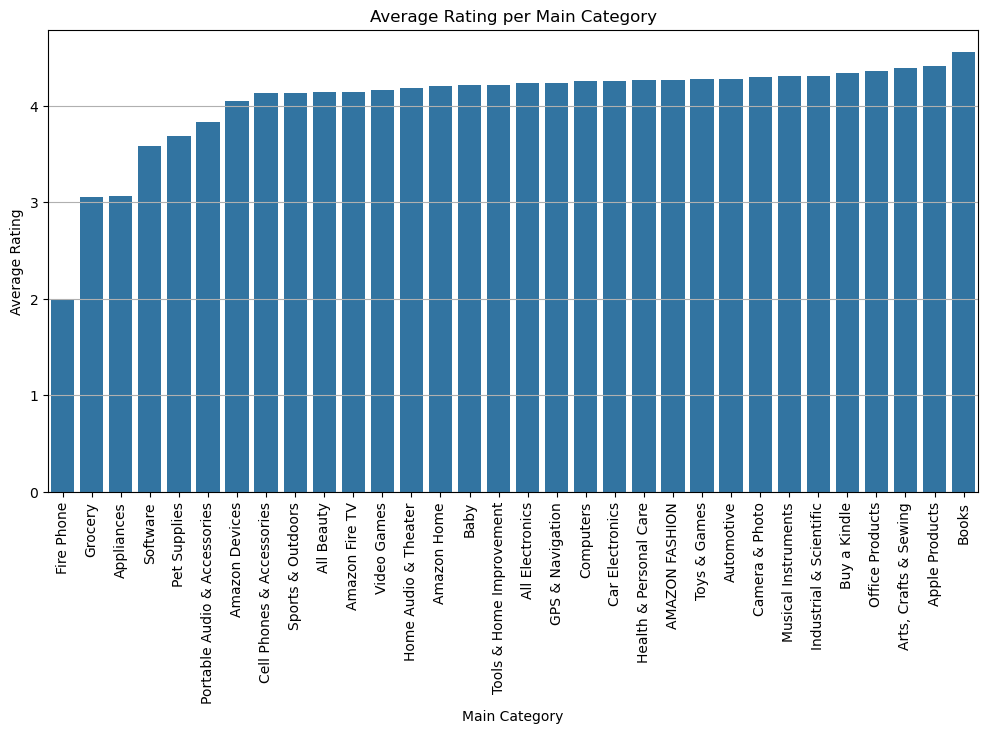

In [13]:
# Average Rating per Main Category
avg_rating_per_category = reviews_df.groupby('main_category')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values)
plt.title('Average Rating per Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


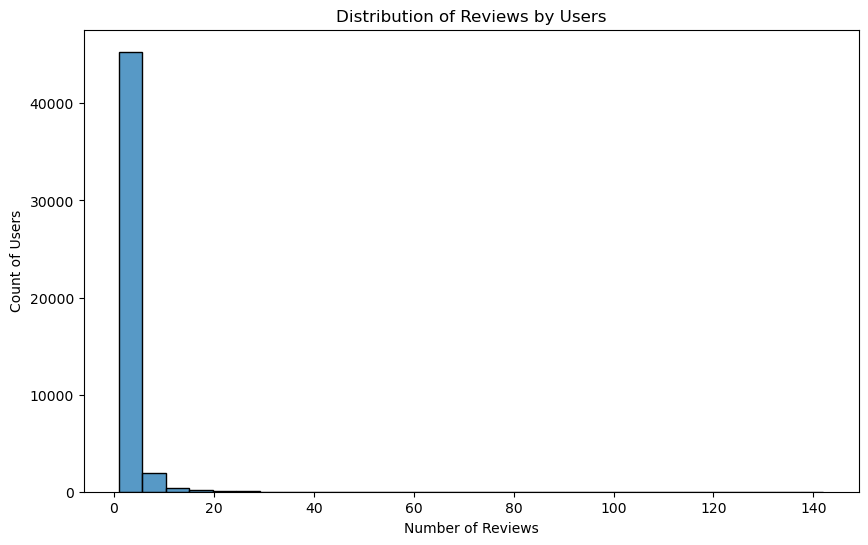

In [22]:
# Count the number of reviews by each user
user_review_count = reviews_df['user_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(user_review_count, bins=30, kde=False)
plt.title('Distribution of Reviews by Users')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Users')
plt.show()


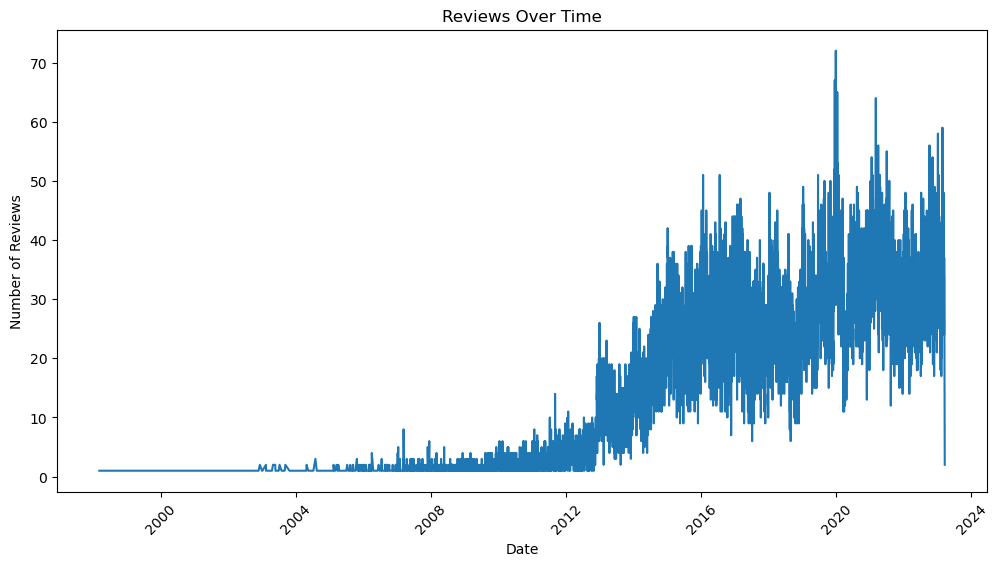

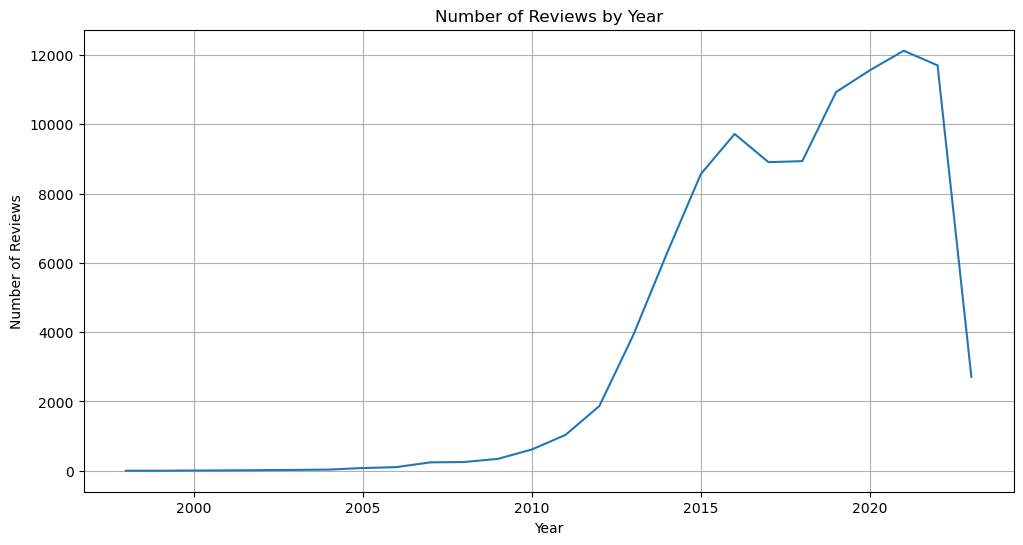

In [24]:
# Convert 'review_date' to datetime
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')
reviews_over_time = reviews_df['review_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(reviews_over_time.index, reviews_over_time.values)
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Yearly analysis
reviews_df['year'] = reviews_df['review_date'].dt.year
reviews_by_year = reviews_df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_by_year.index, y=reviews_by_year.values)
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


In [ ]:
!pip install wordcloud


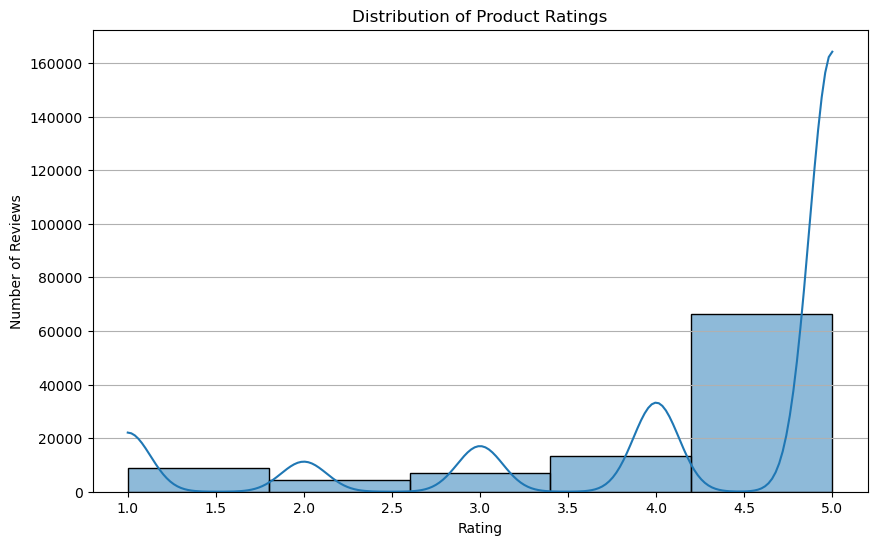

In [61]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['rating'], bins=5, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

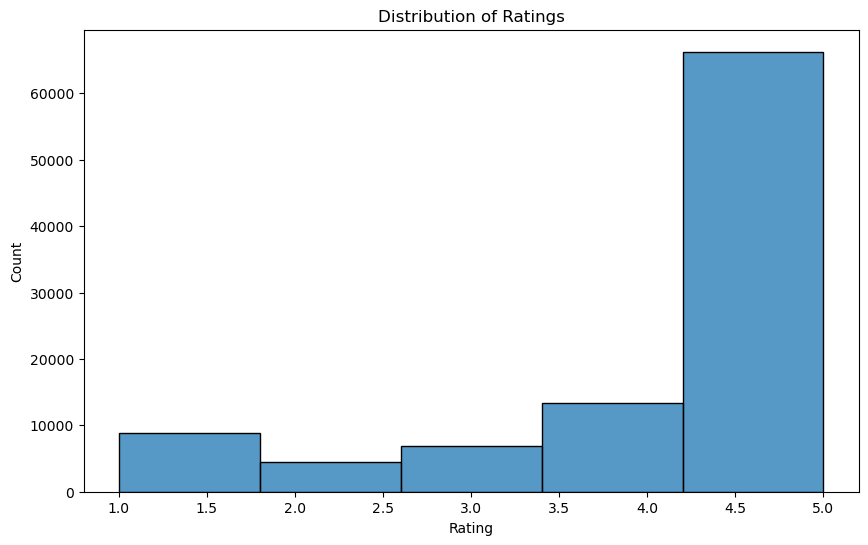

In [64]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

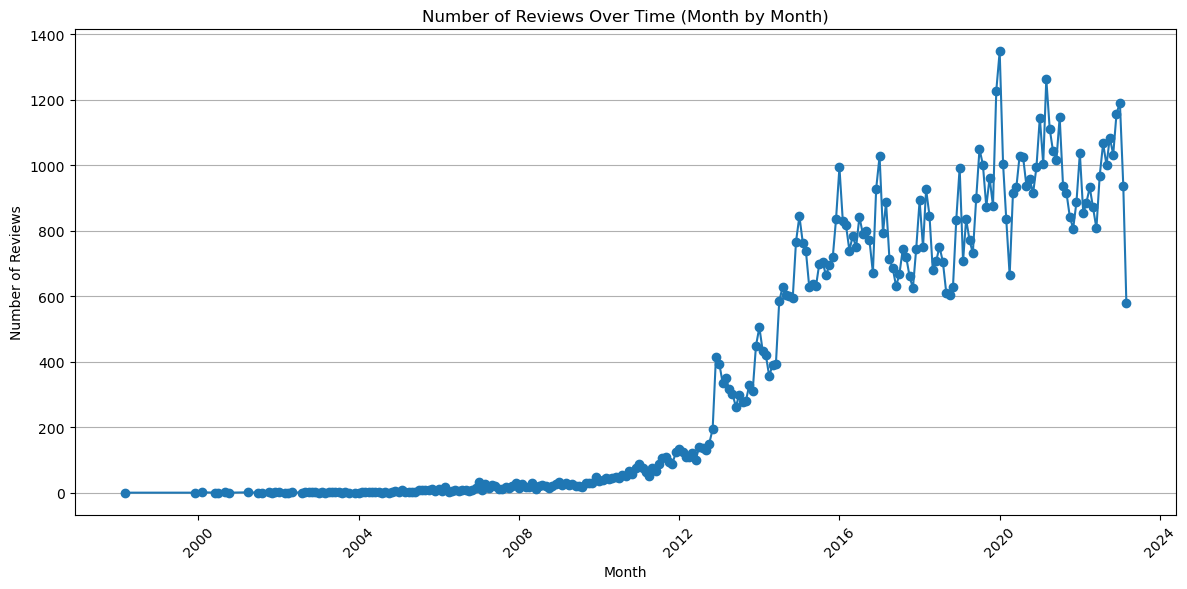

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the `review_date` column is in datetime format
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')

# Extract year and month from the review_date column
reviews_df['year_month'] = reviews_df['review_date'].dt.to_period('M')

# Group by year and month and count the number of reviews
reviews_per_month = reviews_df.groupby('year_month').size()

# Convert index to datetime for plotting
reviews_per_month.index = reviews_per_month.index.to_timestamp()

# Plot the number of reviews per month
plt.figure(figsize=(12, 6))
plt.plot(reviews_per_month.index, reviews_per_month.values, marker='o')
plt.title('Number of Reviews Over Time (Month by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\1874665046.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_performance.index, y=store_performance.values, palette='magma')


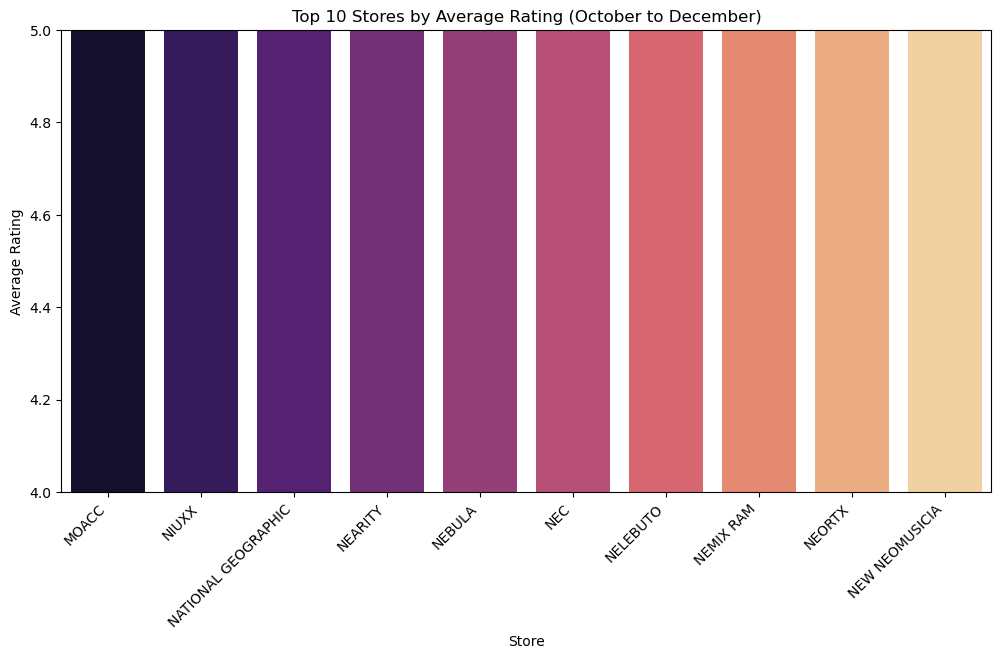

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the `review_date` column is in datetime format
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], errors='coerce')

# Filter reviews for October to December
thanksgiving_reviews = reviews_df[reviews_df['review_date'].dt.month.isin([10, 11, 12])]

# Most Reviewed Products (October to December)
top_reviewed_products = (
    thanksgiving_reviews.groupby('asin')
    .size()
    .sort_values(ascending=False)
    .head(10)  # Top 10 most reviewed products
)


# Plot Store Performance
plt.figure(figsize=(12, 6))
sns.barplot(x=store_performance.index, y=store_performance.values, palette='magma')
plt.title('Top 10 Stores by Average Rating (October to December)')
plt.xlabel('Store')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(4, 5)
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\716940792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_reviews['short_title'] = thanksgiving_reviews['title_y'].str[:16]
C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\716940792.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewed_products.index, y=top_reviewed_products.values, palette='viridis')


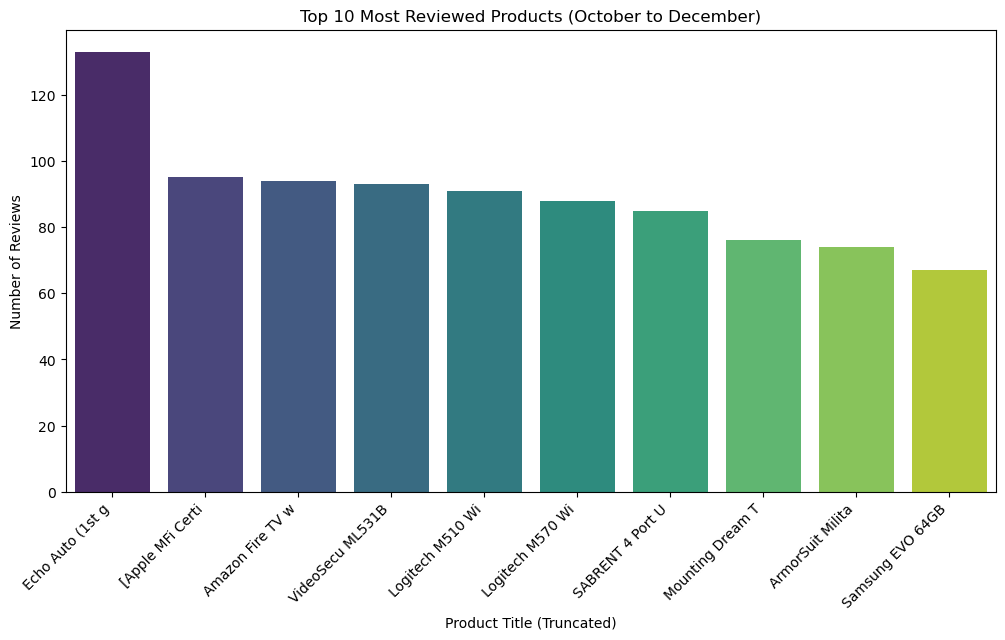

In [31]:
# Add a shortened title column for visualization
thanksgiving_reviews['short_title'] = thanksgiving_reviews['title_y'].str[:16]

# Most Reviewed Products (October to December)
top_reviewed_products = (
    thanksgiving_reviews.groupby('short_title')
    .size()
    .sort_values(ascending=False)
    .head(10)  # Top 10 most reviewed products
)

# Plot Top Reviewed Products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviewed_products.index, y=top_reviewed_products.values, palette='viridis')
plt.title('Top 10 Most Reviewed Products (October to December)')
plt.xlabel('Product Title (Truncated)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2492345235.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_products.index, y=top_rated_products.values, palette='coolwarm')


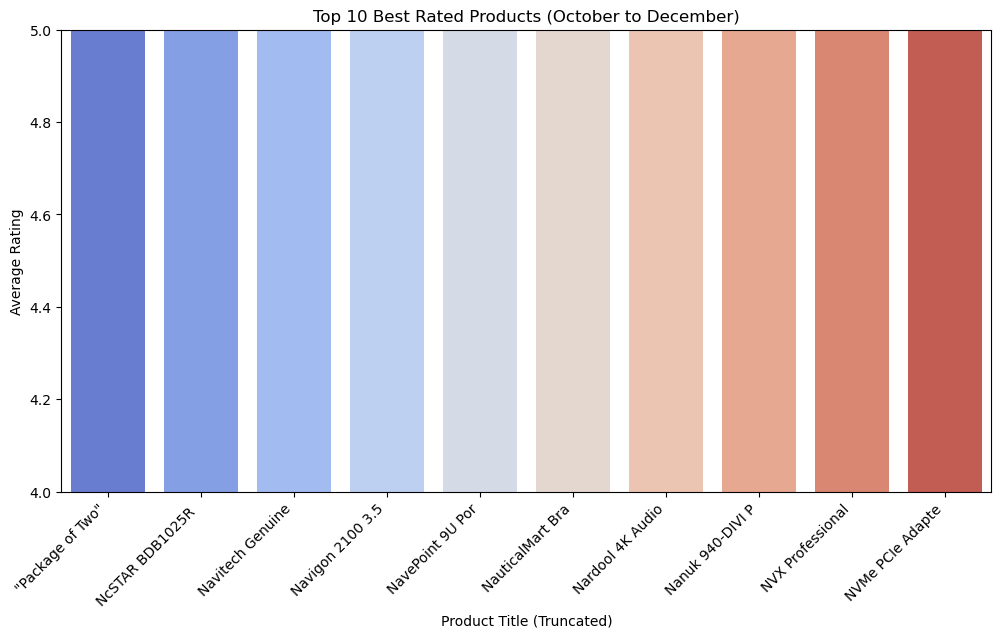

In [32]:
# Best Rated Products (October to December)
top_rated_products = (
    thanksgiving_reviews.groupby('short_title')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Top 10 highest-rated products
)

# Plot Top Rated Products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_products.index, y=top_rated_products.values, palette='coolwarm')
plt.title('Top 10 Best Rated Products (October to December)')
plt.xlabel('Product Title (Truncated)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(4, 5)
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\941355026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_helpful_products.index, y=most_helpful_products.values, palette='plasma')


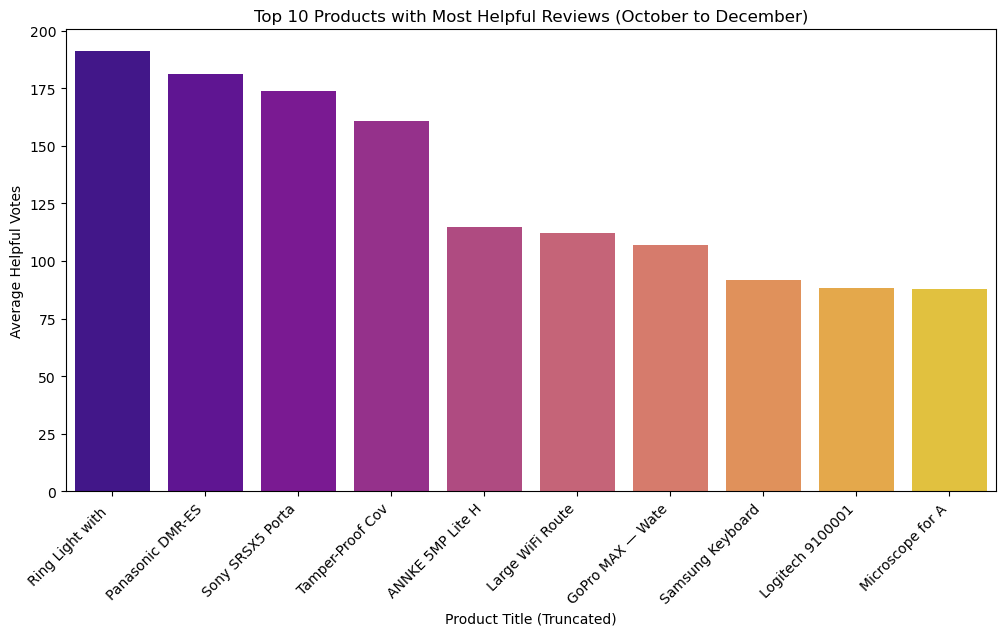

In [33]:
# Products with the Most Helpful Reviews
most_helpful_products = (
    thanksgiving_reviews.groupby('short_title')['helpful_vote']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Top 10 most helpful products
)

# Plot Most Helpful Reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=most_helpful_products.index, y=most_helpful_products.values, palette='plasma')
plt.title('Top 10 Products with Most Helpful Reviews (October to December)')
plt.xlabel('Product Title (Truncated)')
plt.ylabel('Average Helpful Votes')
plt.xticks(rotation=45, ha='right')
plt.show()


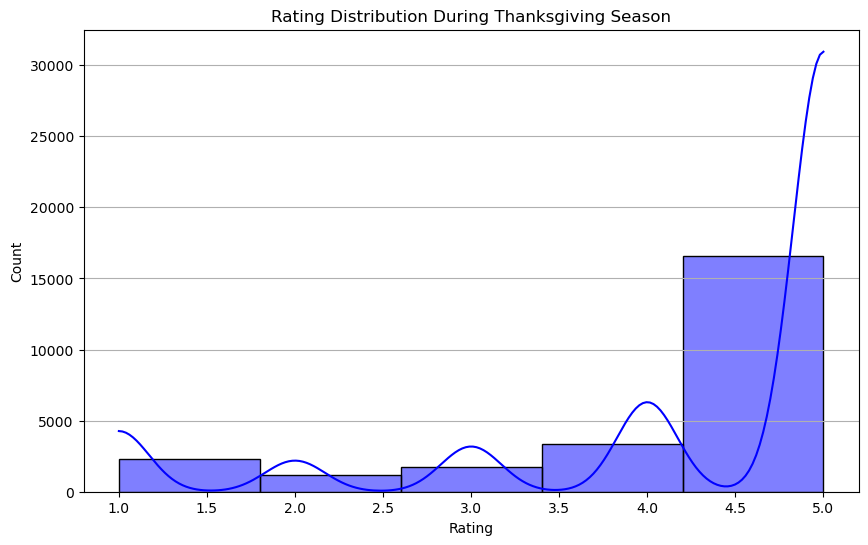

In [34]:
# Rating Distribution During Thanksgiving Season
plt.figure(figsize=(10, 6))
sns.histplot(thanksgiving_reviews['rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution During Thanksgiving Season')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\1255131237.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='cividis')


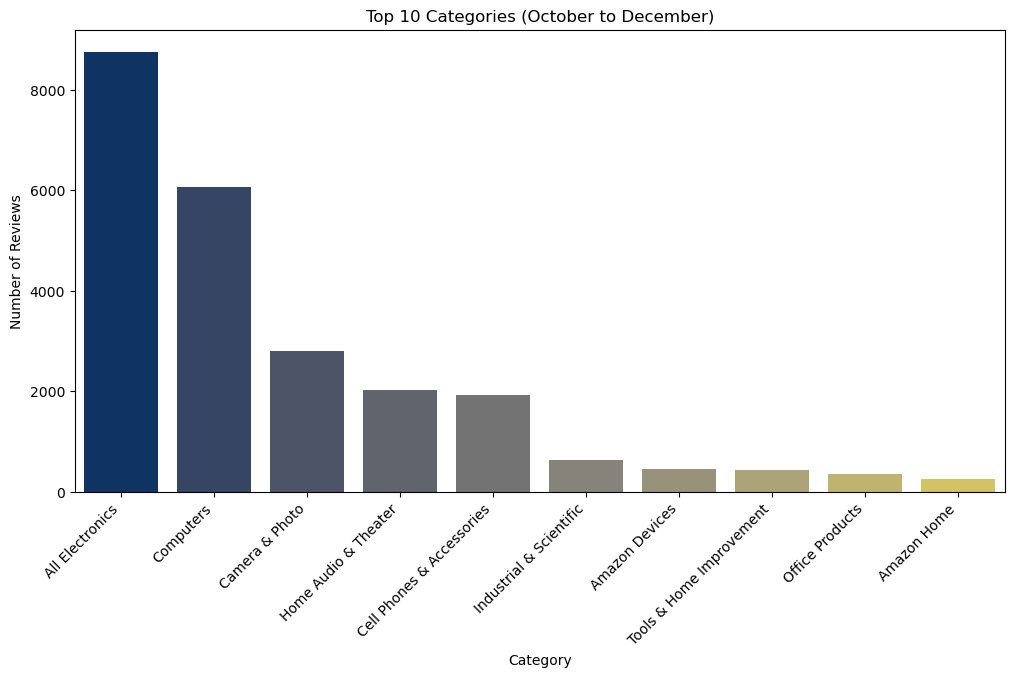

In [35]:
# Most Popular Categories During Thanksgiving Season
top_categories = (
    thanksgiving_reviews.groupby('main_category')
    .size()
    .sort_values(ascending=False)
    .head(10)  # Top 10 categories
)

# Plot Top Categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='cividis')
plt.title('Top 10 Categories (October to December)')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\633124887.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_reviewed_stores.index, y=most_reviewed_stores.values, palette='tab10')


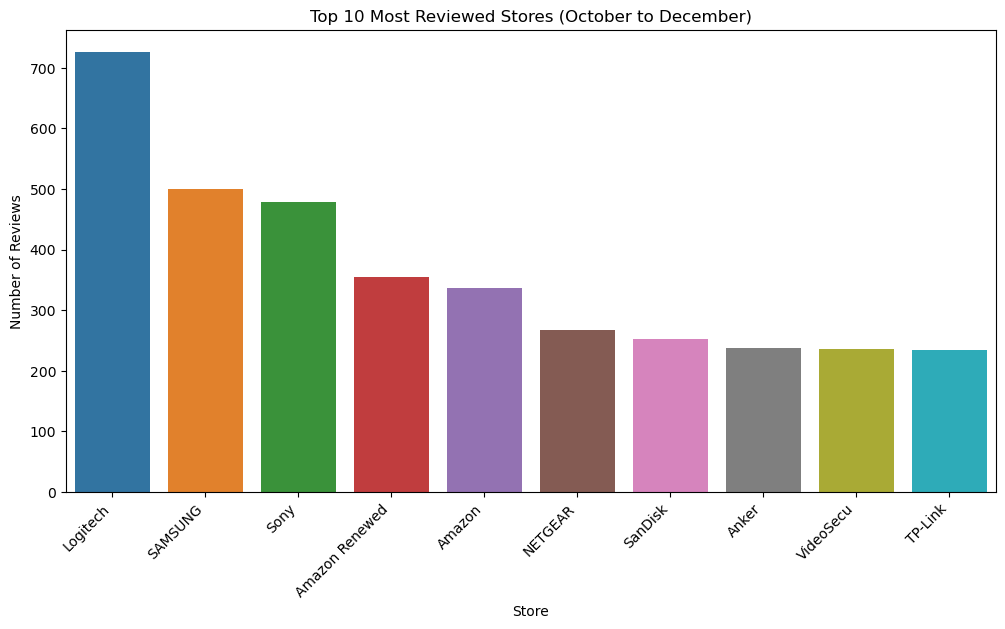

In [36]:
# Most Reviewed Stores (October to December)
most_reviewed_stores = (
    thanksgiving_reviews.groupby('store')
    .size()
    .sort_values(ascending=False)
    .head(10)  # Top 10 stores
)

# Plot Most Reviewed Stores
plt.figure(figsize=(12, 6))
sns.barplot(x=most_reviewed_stores.index, y=most_reviewed_stores.values, palette='tab10')
plt.title('Top 10 Most Reviewed Stores (October to December)')
plt.xlabel('Store')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


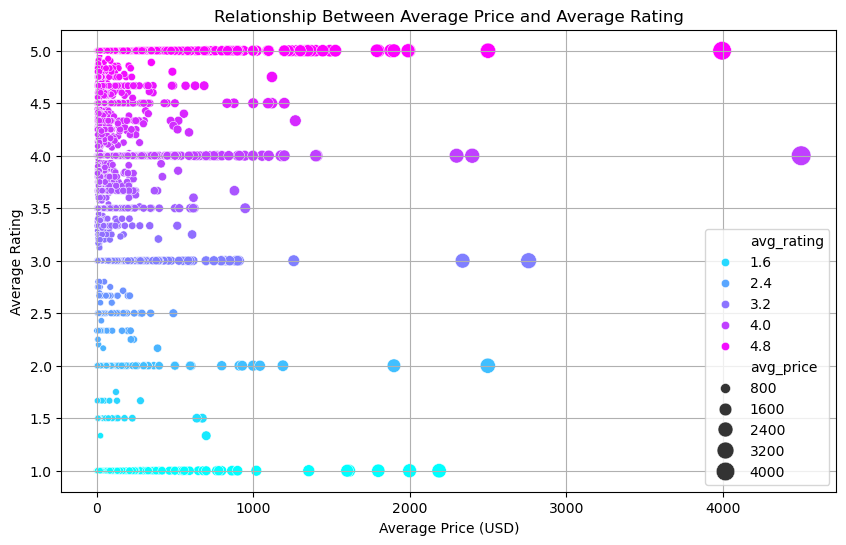

In [37]:
# Scatter Plot: Average Price vs. Rating
average_price_rating = thanksgiving_reviews.groupby('short_title').agg(
    avg_price=('price', 'mean'),
    avg_rating=('rating', 'mean')
).dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=average_price_rating['avg_price'], y=average_price_rating['avg_rating'], hue=average_price_rating['avg_rating'], palette='cool', size=average_price_rating['avg_price'], sizes=(20, 200))
plt.title('Relationship Between Average Price and Average Rating')
plt.xlabel('Average Price (USD)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


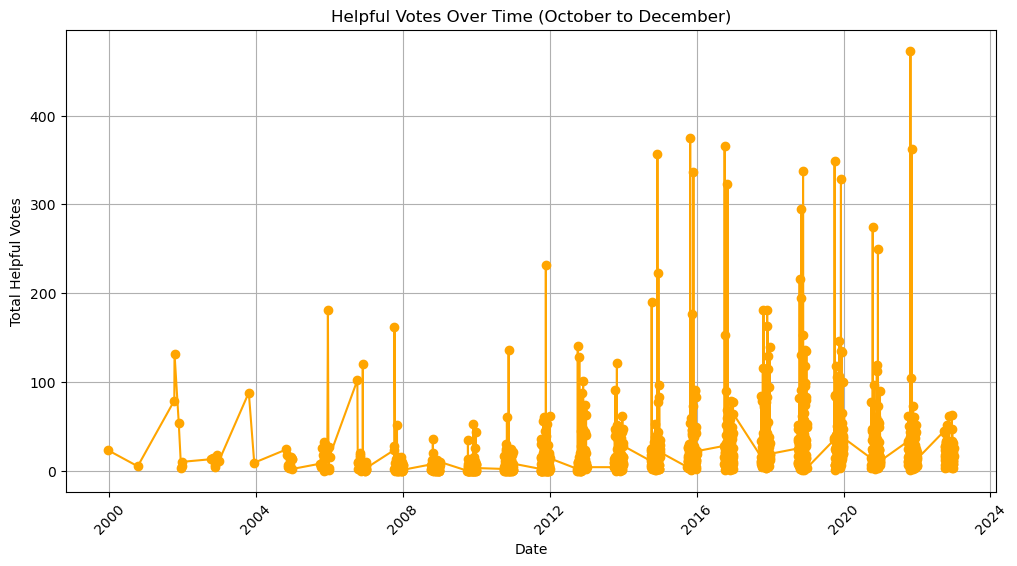

In [38]:
# Helpful Votes Over Time
helpful_votes_over_time = thanksgiving_reviews.groupby('review_date')['helpful_vote'].sum()

plt.figure(figsize=(12, 6))
plt.plot(helpful_votes_over_time.index, helpful_votes_over_time.values, marker='o', color='orange')
plt.title('Helpful Votes Over Time (October to December)')
plt.xlabel('Date')
plt.ylabel('Total Helpful Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\1209544501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified_purchase', y='rating', data=thanksgiving_reviews, palette='Set2')


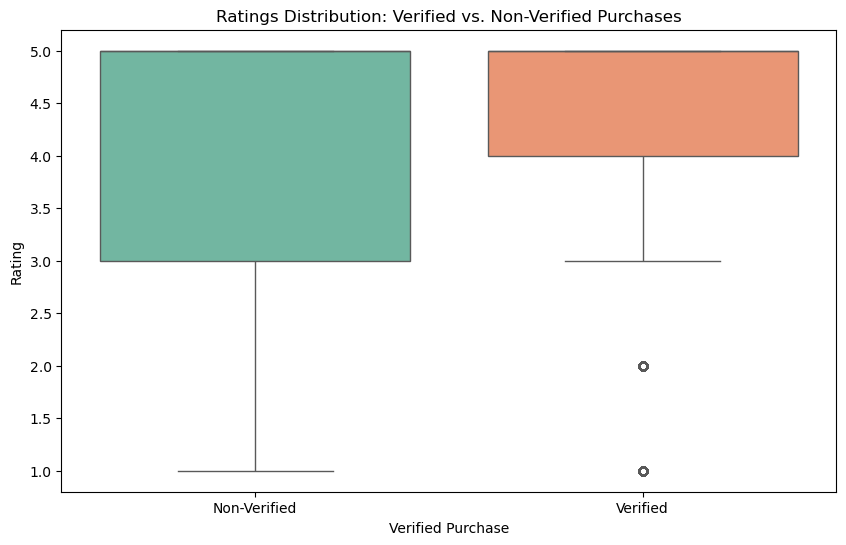

C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\1209544501.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Verified', 'Verified'], y=verified_counts.values, palette='pastel')


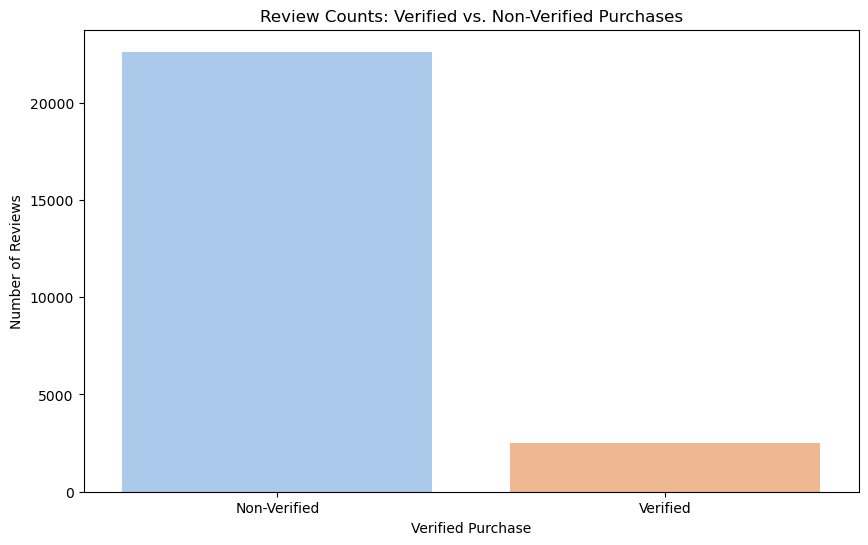

In [39]:
# Ratings Distribution by Verified Purchase Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='verified_purchase', y='rating', data=thanksgiving_reviews, palette='Set2')
plt.xticks([0, 1], ['Non-Verified', 'Verified'])
plt.title('Ratings Distribution: Verified vs. Non-Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Rating')
plt.show()

# Review Counts by Verified Purchase Status
verified_counts = thanksgiving_reviews['verified_purchase'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Non-Verified', 'Verified'], y=verified_counts.values, palette='pastel')
plt.title('Review Counts: Verified vs. Non-Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Number of Reviews')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2117033147.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette='coolwarm')


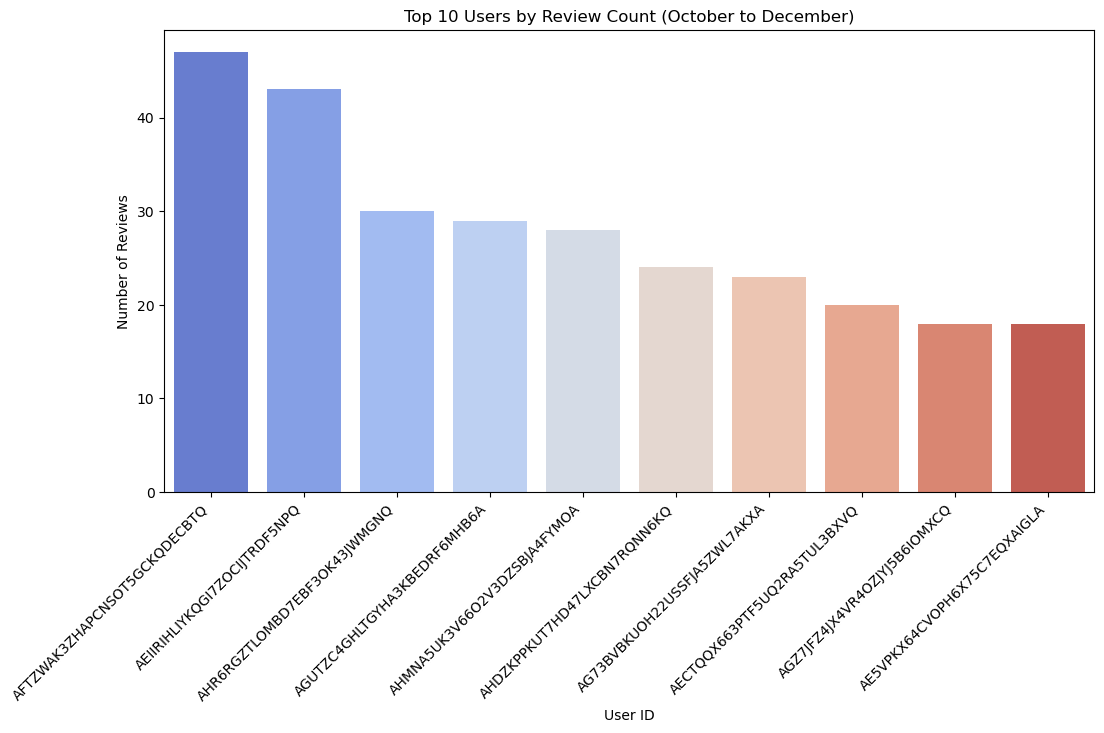

In [40]:
# Top 10 Users by Review Count
top_users = thanksgiving_reviews['user_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette='coolwarm')
plt.title('Top 10 Users by Review Count (October to December)')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\3603006711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_reviews['sentiment'] = thanksgiving_reviews['text'].apply(


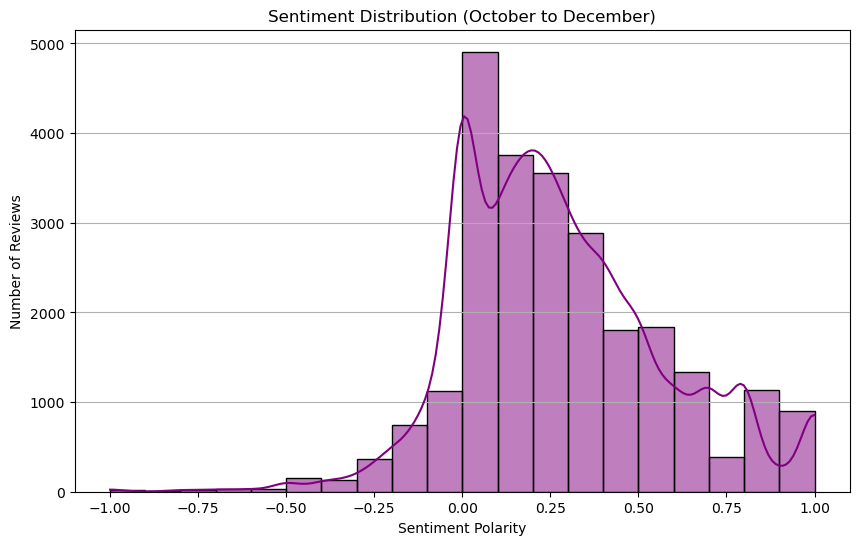

In [54]:
from textblob import TextBlob
#TextBlob is a Python library for processing textual data. i am using it here to see weithe ror not the sentce was negitave or postive regarding teh product
# Sentiment Analysis
thanksgiving_reviews['sentiment'] = thanksgiving_reviews['text'].apply(
    lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else None
)

plt.figure(figsize=(10, 6))
sns.histplot(thanksgiving_reviews['sentiment'], bins=20, kde=True, color='purple')
plt.title('Sentiment Distribution (October to December)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\3083050075.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products['review_count'], palette='cool')


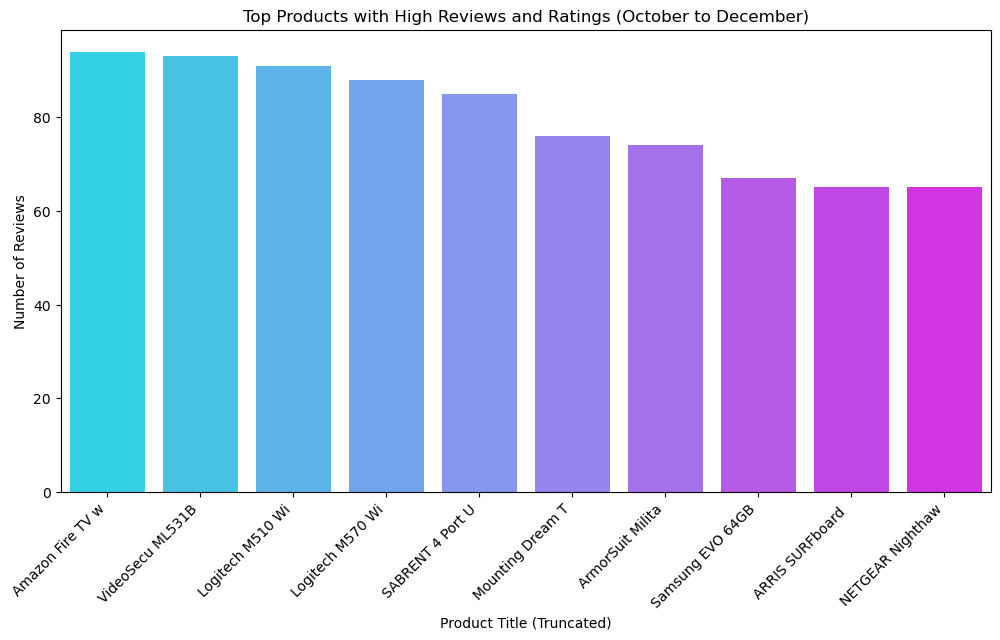

In [43]:
# Combine review count and average rating
top_products = (
    thanksgiving_reviews.groupby('short_title').agg(
        review_count=('rating', 'size'),
        avg_rating=('rating', 'mean')
    )
    .query("review_count > 50 and avg_rating >= 4")  # Filter for popular and high-rated products
    .sort_values(by='review_count', ascending=False)
    .head(10)
)

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products['review_count'], palette='cool')
plt.title('Top Products with High Reviews and Ratings (October to December)')
plt.xlabel('Product Title (Truncated)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2247107732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_reviews['month'] = thanksgiving_reviews['review_date'].dt.month
C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2247107732.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, palette='autumn')


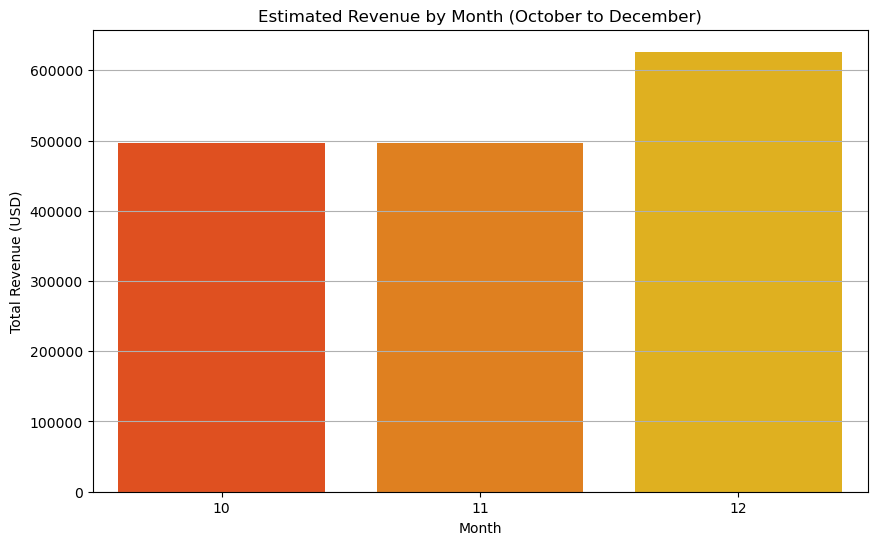

In [44]:
# Estimate Revenue by Month
thanksgiving_reviews['month'] = thanksgiving_reviews['review_date'].dt.month
revenue_per_month = (
    thanksgiving_reviews.groupby('month')['price']
    .sum()
    .reindex([10, 11, 12])  # Ensure correct order for October, November, December
)

# Plot Monthly Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, palette='autumn')
plt.title('Estimated Revenue by Month (October to December)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid(axis='y')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\1759360256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_reviews['review_length'] = thanksgiving_reviews['text'].apply(


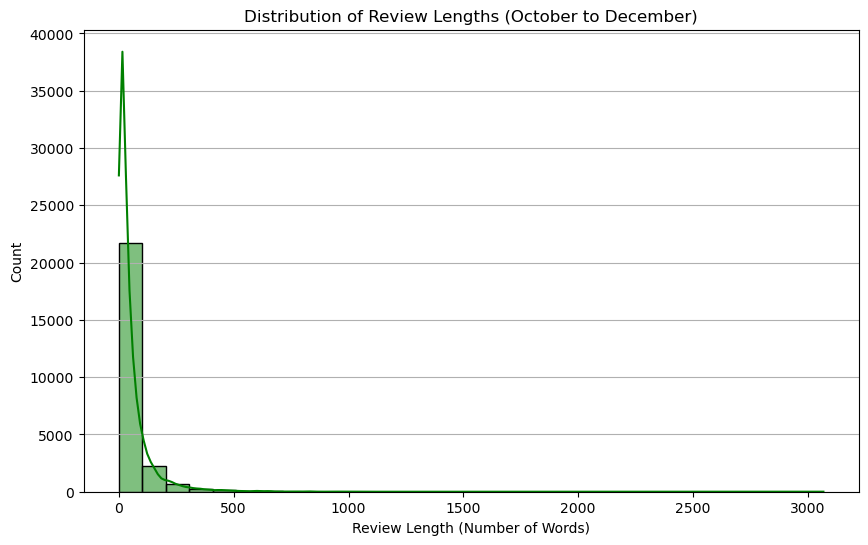

In [45]:
# Add a column for review length
thanksgiving_reviews['review_length'] = thanksgiving_reviews['text'].apply(
    lambda x: len(x.split()) if pd.notnull(x) else 0
)

# Plot Distribution of Review Lengths
plt.figure(figsize=(10, 6))
sns.histplot(thanksgiving_reviews['review_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Review Lengths (October to December)')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\1814054599.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_ratings.index, y=seasonal_ratings.values, palette='Blues')


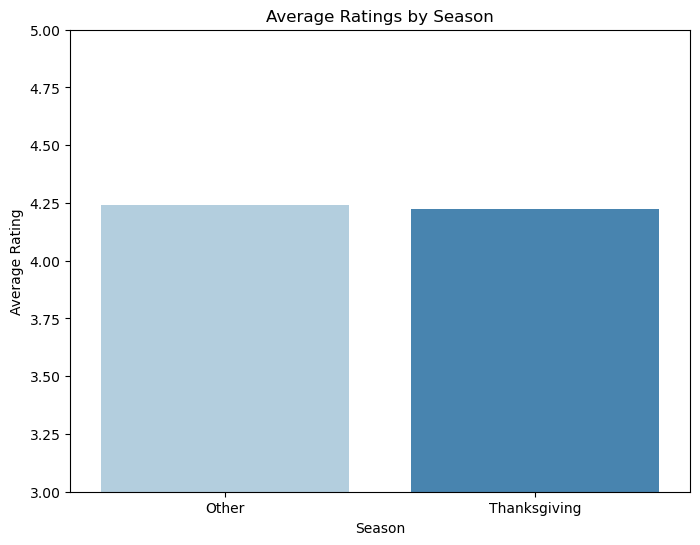

In [46]:
# Add a season column
reviews_df['season'] = reviews_df['review_date'].dt.month.apply(
    lambda x: 'Thanksgiving' if x in [10, 11, 12] else 'Other'
)

# Compare Ratings Between Seasons
seasonal_ratings = reviews_df.groupby('season')['rating'].mean()

# Plot Ratings by Season
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_ratings.index, y=seasonal_ratings.values, palette='Blues')
plt.title('Average Ratings by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.ylim(3, 5)  # Focus on rating scale
plt.show()


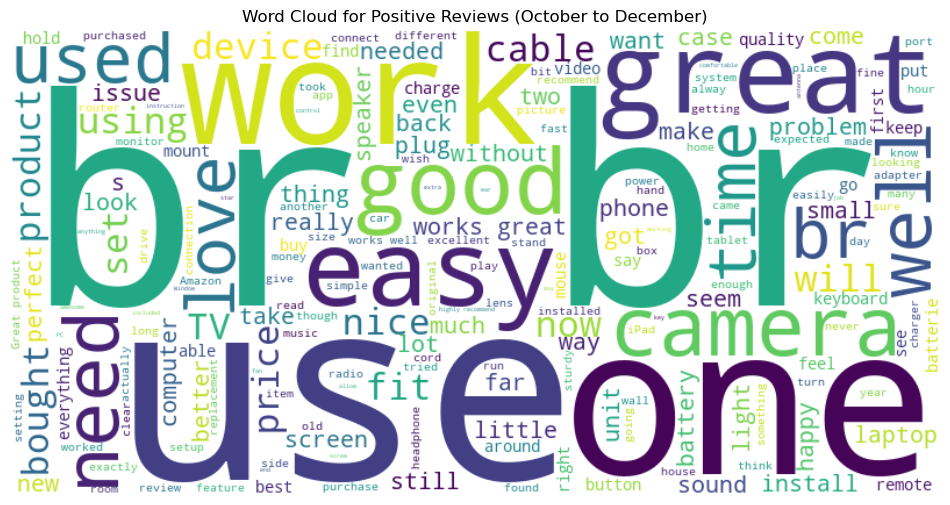

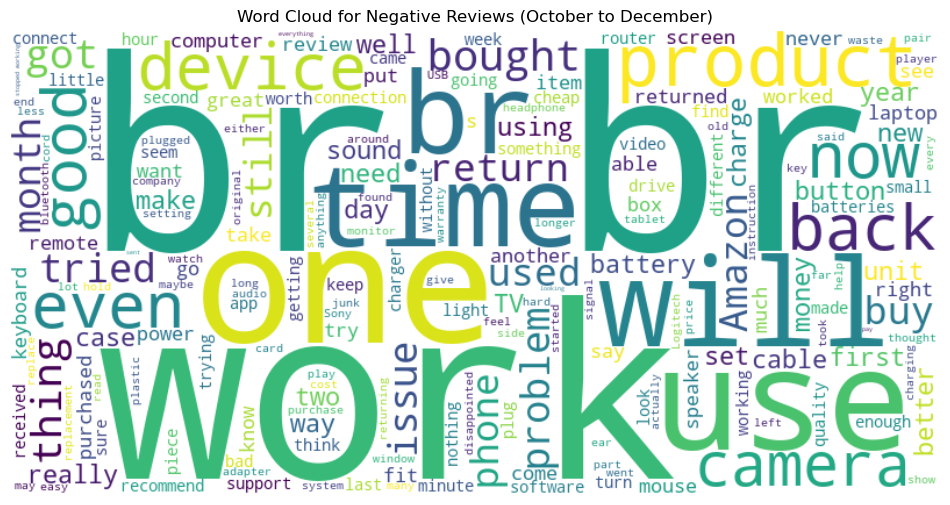

In [47]:
from wordcloud import WordCloud

# Generate Word Cloud for Positive Reviews
positive_reviews = " ".join(
    review for review in thanksgiving_reviews[thanksgiving_reviews['rating'] >= 4]['text'] if pd.notnull(review)
)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot Positive Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews (October to December)')
plt.show()

# Generate Word Cloud for Negative Reviews
negative_reviews = " ".join(
    review for review in thanksgiving_reviews[thanksgiving_reviews['rating'] <= 2]['text'] if pd.notnull(review)
)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot Negative Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (October to December)')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2143184561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_reviews['sentiment_polarity'] = thanksgiving_reviews['text'].apply(
C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\2143184561.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette='coolwarm')


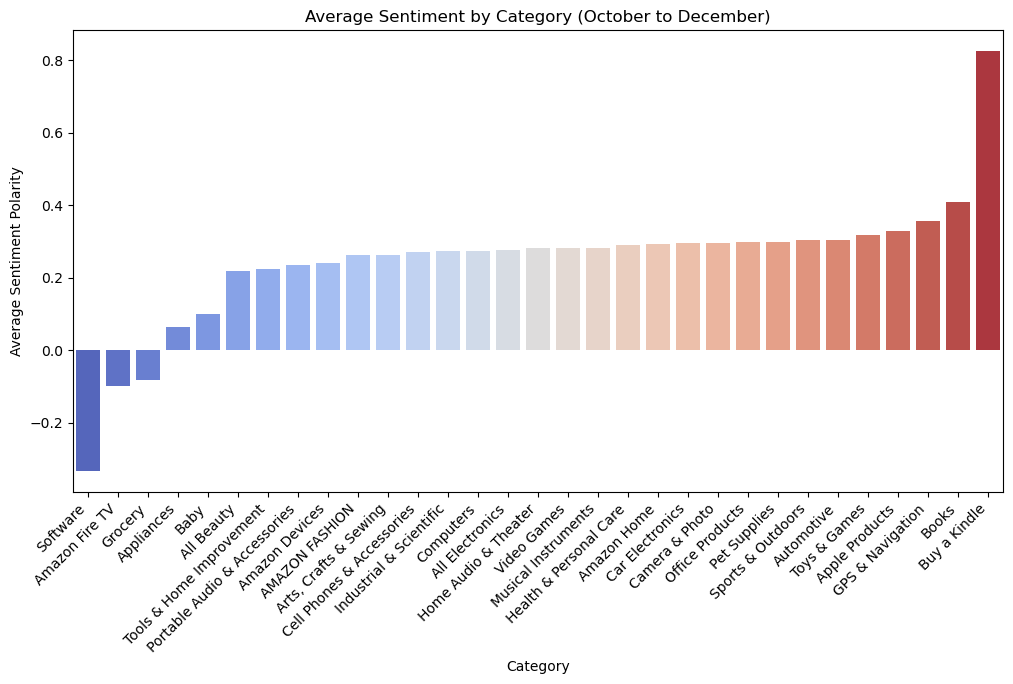

In [48]:
from textblob import TextBlob
# this one is a ringer we shoudl spend time on this
# Calculate sentiment polarity for each review
thanksgiving_reviews['sentiment_polarity'] = thanksgiving_reviews['text'].apply(
    lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else None
)

# Average sentiment by category
category_sentiment = thanksgiving_reviews.groupby('main_category')['sentiment_polarity'].mean().sort_values()

# Plot sentiment by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette='coolwarm')
plt.title('Average Sentiment by Category (October to December)')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\861773502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanksgiving_reviews['year_month'] = thanksgiving_reviews['review_date'].dt.to_period('M')


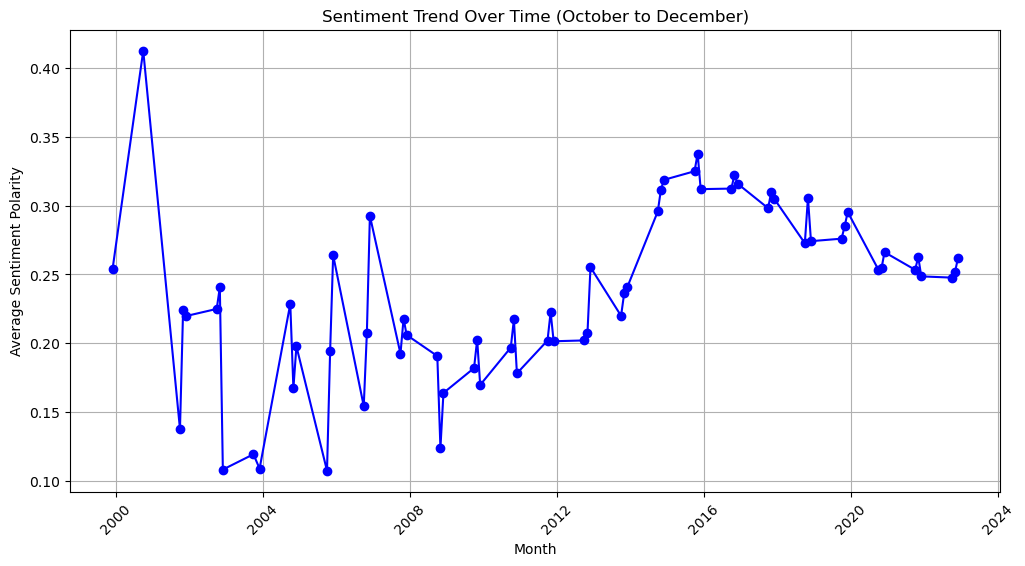

In [49]:
# Extract year and month for grouping
thanksgiving_reviews['year_month'] = thanksgiving_reviews['review_date'].dt.to_period('M')

# Average sentiment per month
sentiment_trend = thanksgiving_reviews.groupby('year_month')['sentiment_polarity'].mean()

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trend.index.to_timestamp(), sentiment_trend.values, marker='o', color='blue')
plt.title('Sentiment Trend Over Time (October to December)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\670043286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified_purchase', y='sentiment_polarity', data=thanksgiving_reviews, palette='Set2')


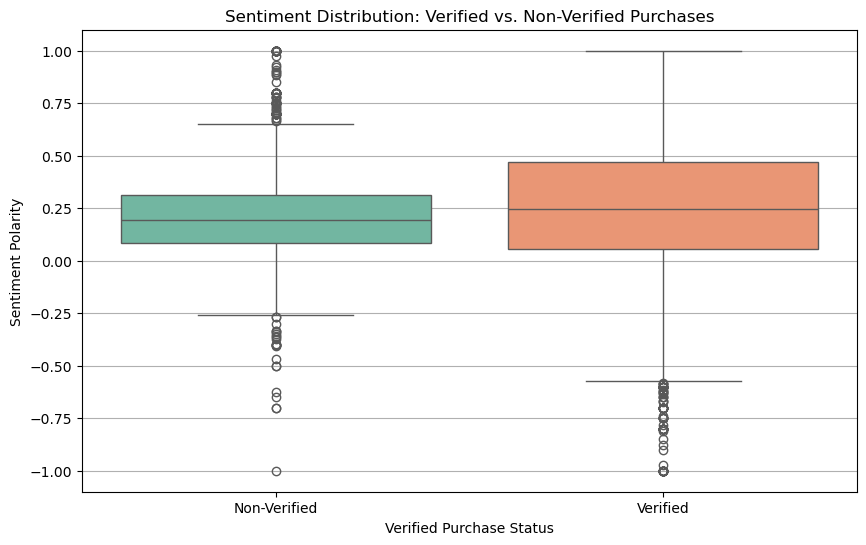

In [50]:
# Compare sentiment for verified and non-verified purchases
plt.figure(figsize=(10, 6))
sns.boxplot(x='verified_purchase', y='sentiment_polarity', data=thanksgiving_reviews, palette='Set2')
plt.xticks([0, 1], ['Non-Verified', 'Verified'])
plt.title('Sentiment Distribution: Verified vs. Non-Verified Purchases')
plt.xlabel('Verified Purchase Status')
plt.ylabel('Sentiment Polarity')
plt.grid(axis='y')
plt.show()


In [51]:
# Longest Review
longest_review = thanksgiving_reviews.loc[thanksgiving_reviews['review_length'].idxmax()]
print("Longest Review:", longest_review['text'])
print("Sentiment Polarity:", TextBlob(longest_review['text']).sentiment.polarity)

# Shortest Review
shortest_review = thanksgiving_reviews.loc[thanksgiving_reviews['review_length'].idxmin()]
print("Shortest Review:", shortest_review['text'])
print("Sentiment Polarity:", TextBlob(shortest_review['text']).sentiment.polarity)


Longest Review: PLEASE SEE MY MORE RECENT UPDATES AT THE END OF THIS REVIEW.  I've downgraded my rating from 5 stars to 4 as well.<br /><br />For the past couple of months I've been looking for a high end "pocket" camera to fill the gap between my Casio throw-away and my Nikon D200.  I read all the reviews for the Ricoh GRD iii and iv, and couple of other cameras in that price range and performance, and was just about to pull the trigger on one of those choices.<br /><br />Then, just a week ago, I stumbled on to a reference for the Fuji X10.  I had long lusted after the previously-released X100, but just decided that the buy-in price was a bit too steep just for the cool-factor, for a camera barely less portable than the D200.<br /><br />After lots of pondering, I decided to place an Amazon order for this camera.  Then, as now (late Nov 2011), Amazon showed the camera as currently out of stock.  I went ahead and placed the provisional order.  Two days later, I received notice that Amaz

C:\Users\meme machine\AppData\Local\Temp\ipykernel_34076\3159386940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_length_by_rating.index, y=review_length_by_rating.values, palette='viridis')


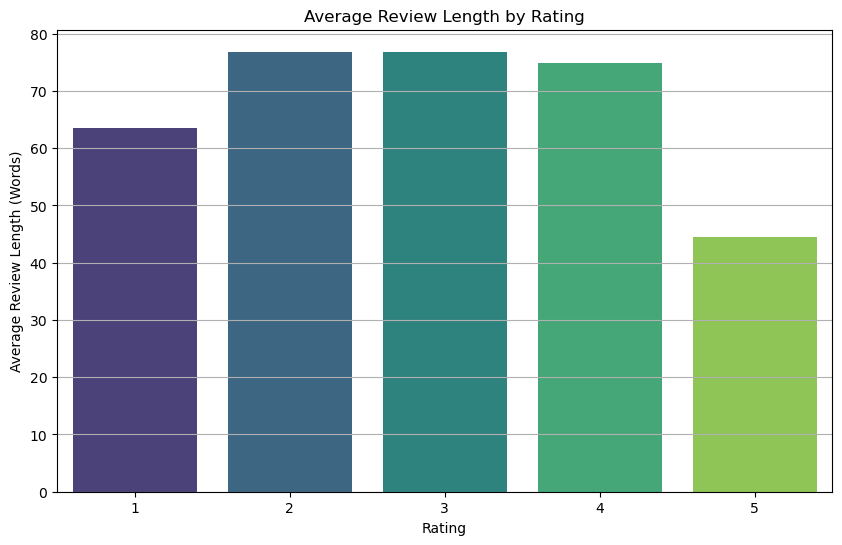

In [52]:
# Average review length by rating
review_length_by_rating = thanksgiving_reviews.groupby('rating')['review_length'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=review_length_by_rating.index, y=review_length_by_rating.values, palette='viridis')
plt.title('Average Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length (Words)')
plt.grid(axis='y')
plt.show()
#Do Customers Write More Detailed Reviews for High or Low Ratings?

In [55]:
# Compare sentiment by season Seasonal vs. Non-Seasonal Performance
seasonal_sentiment = reviews_df.groupby('season')['sentiment_polarity'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_sentiment.index, y=seasonal_sentiment.values, palette='cividis')
plt.title('Average Sentiment Polarity by Season')
plt.xlabel('Season')
plt.ylabel('Average Sentiment Polarity')
plt.ylim(-0.5, 0.5)  # Sentiment polarity range
plt.grid(axis='y')
plt.show()


KeyError: 'Column not found: sentiment_polarity'

In [56]:
# Products with high reviews but low sentiment
underperforming_products = (
    thanksgiving_reviews.groupby('short_title').agg(
        review_count=('rating', 'size'),
        avg_rating=('rating', 'mean'),
        avg_sentiment=('sentiment_polarity', 'mean')
    )
    .query("review_count > 50 and avg_sentiment < 0")
    .sort_values(by='avg_sentiment')
)

print("Underperforming Products:\n", underperforming_products)


Underperforming Products:
 Empty DataFrame
Columns: [review_count, avg_rating, avg_sentiment]
Index: []
